In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

plt.style.use('ggplot')
#np.set_printoptions(suppress=True)

In [123]:
kickstarter = pd.read_csv('kickstarter_cleaned_04_24_19_1_08_pm.csv')

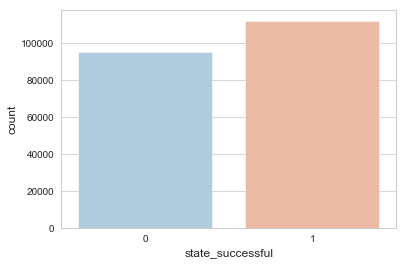

In [124]:
sns.set_style('whitegrid')
sns.countplot(x='state_successful',data=kickstarter,palette='RdBu_r')

In [125]:
kickstarter.columns

Index(['id', 'blurb', 'slug', 'state_successful', 'converted_pledged_amount',
       'goal', 'backers_count', 'created_at', 'launched_at', 'deadline',
       'staff_pick_True', 'spotlight_True', 'child_category',
       'main_category_comics', 'main_category_crafts', 'main_category_dance',
       'main_category_design', 'main_category_fashion',
       'main_category_film & video', 'main_category_food',
       'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'country_CA', 'country_DE', 'country_FR',
       'country_GB', 'country_IT', 'country_MX', 'country_NL', 'country_OTHER',
       'country_US', 'location'],
      dtype='object')

In [126]:
kickstarter.describe()

,id,state_successful,converted_pledged_amount,goal,backers_count,staff_pick_True,spotlight_True,main_category_comics,main_category_crafts,main_category_dance,...,main_category_theater,country_CA,country_DE,country_FR,country_GB,country_IT,country_MX,country_NL,country_OTHER,country_US
count,2.070490e+05,207049.000000,2.070490e+05,2.070490e+05,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,...,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000,207049.000000
mean,1.074044e+09,0.541514,1.157873e+04,4.414080e+04,136.686683,0.123179,0.541514,0.045265,0.022821,0.011089,...,0.034050,0.040667,0.012867,0.009867,0.095132,0.009268,0.007882,0.008124,0.030432,0.757376
std,6.188918e+08,0.498275,8.314121e+04,1.075333e+06,890.951528,0.328643,0.498275,0.207885,0.149332,0.104720,...,0.181358,0.197517,0.112699,0.098843,0.293398,0.095825,0.088431,0.089765,0.171774,0.428670
min,8.624000e+03,0.000000,0.000000e+00,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.371622e+08,0.000000,9.100000e+01,1.500000e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.075551e+09,1.000000,1.367000e+03,5.000000e+03,24.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.608816e+09,1.000000,6.000000e+03,1.500000e+04,82.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.147476e+09,1.000000,8.596474e+06,1.000000e+08,105857.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
kickstarter.corr()

,id,state_successful,converted_pledged_amount,goal,backers_count,staff_pick_True,spotlight_True,main_category_comics,main_category_crafts,main_category_dance,...,main_category_theater,country_CA,country_DE,country_FR,country_GB,country_IT,country_MX,country_NL,country_OTHER,country_US
id,1.000000,-0.001123,-0.001672,0.001225,-0.002764,0.001561,-0.001123,-0.003679,0.000227,-0.000158,...,-0.004653,0.001890,0.000914,-0.003097,-0.004030,-0.004849,0.001350,0.000688,0.000971,0.002277
state_successful,-0.001123,1.000000,0.115675,-0.032901,0.127866,0.257697,1.000000,0.092598,-0.072936,0.039494,...,0.083555,-0.033005,-0.039185,-0.018761,0.001480,-0.059090,-0.032966,-0.037667,-0.035611,0.090696
converted_pledged_amount,-0.001672,0.115675,1.000000,0.012551,0.804285,0.151451,0.115675,-0.007445,-0.017469,-0.009906,...,-0.016188,-0.009708,0.001002,0.000908,-0.010965,-0.004464,-0.010684,0.001953,-0.001424,0.018025
goal,0.001225,-0.032901,0.012551,1.000000,0.012691,-0.004674,-0.032901,-0.007108,-0.004399,-0.003544,...,-0.003165,0.000035,0.002949,-0.000374,-0.006799,0.001171,0.017475,0.002229,0.027679,-0.013301
backers_count,-0.002764,0.127866,0.804285,0.012691,1.000000,0.164032,0.127866,0.010140,-0.017380,-0.010526,...,-0.017841,-0.005095,-0.001012,-0.001328,-0.007570,-0.006956,-0.010826,-0.002752,-0.005883,0.017493
staff_pick_True,0.001561,0.257697,0.151451,-0.004674,0.164032,1.000000,0.257697,0.086146,-0.027557,0.016445,...,0.000372,-0.014744,-0.000150,-0.001435,-0.001465,-0.021223,0.006975,-0.004615,-0.019348,0.030062
spotlight_True,-0.001123,1.000000,0.115675,-0.032901,0.127866,0.257697,1.000000,0.092598,-0.072936,0.039494,...,0.083555,-0.033005,-0.039185,-0.018761,0.001480,-0.059090,-0.032966,-0.037667,-0.035611,0.090696
main_category_comics,-0.003679,0.092598,-0.007445,-0.007108,0.010140,0.086146,0.092598,1.000000,-0.033275,-0.023057,...,-0.040881,0.017746,-0.015788,-0.014450,-0.001313,-0.007483,-0.005746,-0.015564,-0.019099,0.016632
main_category_crafts,0.000227,-0.072936,-0.017469,-0.004399,-0.017380,-0.027557,-0.072936,-0.033275,1.000000,-0.016183,...,-0.028692,0.005870,-0.003098,0.000451,-0.000275,-0.002630,0.004300,-0.004822,0.004370,-0.002234
main_category_dance,-0.000158,0.039494,-0.009906,-0.003544,-0.010526,0.016445,0.039494,-0.023057,-0.016183,1.000000,...,-0.019882,-0.008026,-0.007588,-0.004039,-0.013428,-0.008317,-0.000051,-0.002904,-0.012585,0.027335


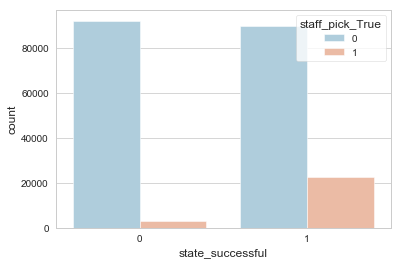

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='state_successful',hue='staff_pick_True',data=kickstarter,palette='RdBu_r')

In [132]:
kickstarter[['converted_pledged_amount', 'goal']].dtypes

converted_pledged_amount      int64
goal                        float64
dtype: object

In [133]:
kickstarter['goal']=kickstarter['goal'].astype('int64')

In [134]:
kickstarter[['converted_pledged_amount', 'goal']].dtypes

converted_pledged_amount    int64
goal                        int64
dtype: object

In [155]:
kickstarter_numeric = kickstarter.drop(columns = ['blurb', 'backers_count', 'converted_pledged_amount','id', 'spotlight_True', 'slug', 'child_category','location','created_at', 'launched_at', 'deadline'])

In [156]:
kickstarter_numeric.columns

Index(['state_successful', 'goal', 'staff_pick_True', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'country_CA', 'country_DE', 'country_FR',
       'country_GB', 'country_IT', 'country_MX', 'country_NL', 'country_OTHER',
       'country_US'],
      dtype='object')

In [165]:
X_train, X_test, y_train, y_test = train_test_split(kickstarter_numeric.drop('state_successful',axis=1), 
                                                    kickstarter['state_successful'], test_size=0.30, 
                                                    random_state=101)

In [166]:
logmodel_simple = LogisticRegression()
logmodel_simple.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
predictions_simple = logmodel_simple.predict(X_test)

In [168]:
print(classification_report(y_test,predictions_simple))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63     28345
           1       0.00      0.00      0.00     33770

   micro avg       0.46      0.46      0.46     62115
   macro avg       0.23      0.50      0.31     62115
weighted avg       0.21      0.46      0.29     62115



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(y_test, logmodel_simple.predict(X_test)))

kNN confusion matrix: 

 [[28345     0]
 [33770     0]]


In [170]:
logmodel_CV = LogisticRegressionCV()
logmodel_CV.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [171]:
predictions_CV = logmodel_CV.predict(X_test)

In [172]:
print(classification_report(y_test,predictions_CV))

              precision    recall  f1-score   support

           0       0.79      0.19      0.31     28345
           1       0.59      0.96      0.73     33770

   micro avg       0.61      0.61      0.61     62115
   macro avg       0.69      0.57      0.52     62115
weighted avg       0.68      0.61      0.54     62115



In [173]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(y_test, logmodel_CV.predict(X_test)))

kNN confusion matrix: 

 [[ 5420 22925]
 [ 1420 32350]]
